# Regresja liniowa

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Zbiór danych

Zajmiemy się analizą danych wiążących śmiertelność chorób nowotworowych w poszczególnych hrabstwach USA z danymi demograficznymi z tych hrabstw. Ponieważ zbiór zawiera bardzo dużo zmiennych opisujących, co utrudnia wizualizację, w celach dydaktycznych wybrano tylko kilka z nich:

* **PctPublicCoverageAlone** - mieszkańcy hrabstwa z ubezpieczeniem zdrowotnym pokrywanym przez państwo (wyrażone w procentach)
* **povertyPercent** - mieszkańcy hrabstwa, którzy żyją w ubóstwie (wyrażone w procentach)
* **AvgHouseholdSize** - średni rozmiar gospodarstwa domowego w hrabstwie
* **PctUnemployed16_Over** - mieszkańcy hrabstwa powyżej 16 roku życia, którzy sa bezrobotni (wyrażone w procentach)
* **PctHS18_24** - mieszkańcy hrabstwa w wieku 18-24 lata z wykształceniem średnim lub niższym (wyrażone w procentach)

Zmienna opisywana:

* **TARGET_deathRate** - średnia liczba osób na 100 000 mieszkańców, które umarły z powodu chorób nowotworowych w latach 2010-2016 

Źródło zbioru danych: https://data.world/nrippner/ols-regression-challenge

In [5]:
cancer_data = pd.read_csv("cancer_reg.csv")[["TARGET_deathRate", "PctPublicCoverageAlone", "povertyPercent", "AvgHouseholdSize", "PctUnemployed16_Over", "PctHS18_24"]]

In [6]:
cancer_data.keys()

Index(['TARGET_deathRate', 'PctPublicCoverageAlone', 'povertyPercent',
       'AvgHouseholdSize', 'PctUnemployed16_Over', 'PctHS18_24'],
      dtype='object')

In [7]:
cancer_data.head()

,TARGET_deathRate,PctPublicCoverageAlone,povertyPercent,AvgHouseholdSize,PctUnemployed16_Over,PctHS18_24
0,164.9,14.0,11.2,2.54,8.0,39.5
1,161.3,15.3,18.6,2.34,7.8,22.4
2,174.7,21.1,14.6,2.62,7.0,36.6
3,194.8,25.0,17.1,2.52,12.1,41.2
4,144.4,22.7,12.5,2.34,4.8,43.0


In [8]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TARGET_deathRate        3047 non-null   float64
 1   PctPublicCoverageAlone  3047 non-null   float64
 2   povertyPercent          3047 non-null   float64
 3   AvgHouseholdSize        3047 non-null   float64
 4   PctUnemployed16_Over    3047 non-null   float64
 5   PctHS18_24              3047 non-null   float64
dtypes: float64(6)
memory usage: 143.0 KB


In [9]:
cancer_data.describe()

,TARGET_deathRate,PctPublicCoverageAlone,povertyPercent,AvgHouseholdSize,PctUnemployed16_Over,PctHS18_24
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,178.664063,19.240072,16.878175,2.479662,7.852412,35.002068
std,27.751511,6.113041,6.409087,0.429174,3.452371,9.069722
min,59.700000,2.600000,3.200000,0.022100,0.400000,0.000000
25%,161.200000,14.850000,12.150000,2.370000,5.500000,29.200000
50%,178.100000,18.800000,15.900000,2.500000,7.600000,34.700000
75%,195.200000,23.100000,20.400000,2.630000,9.700000,40.700000
max,362.800000,46.600000,47.400000,3.970000,29.400000,72.500000


Zwizualizujmy, jak poszczególne zmienne w modelu zależą od siebie.

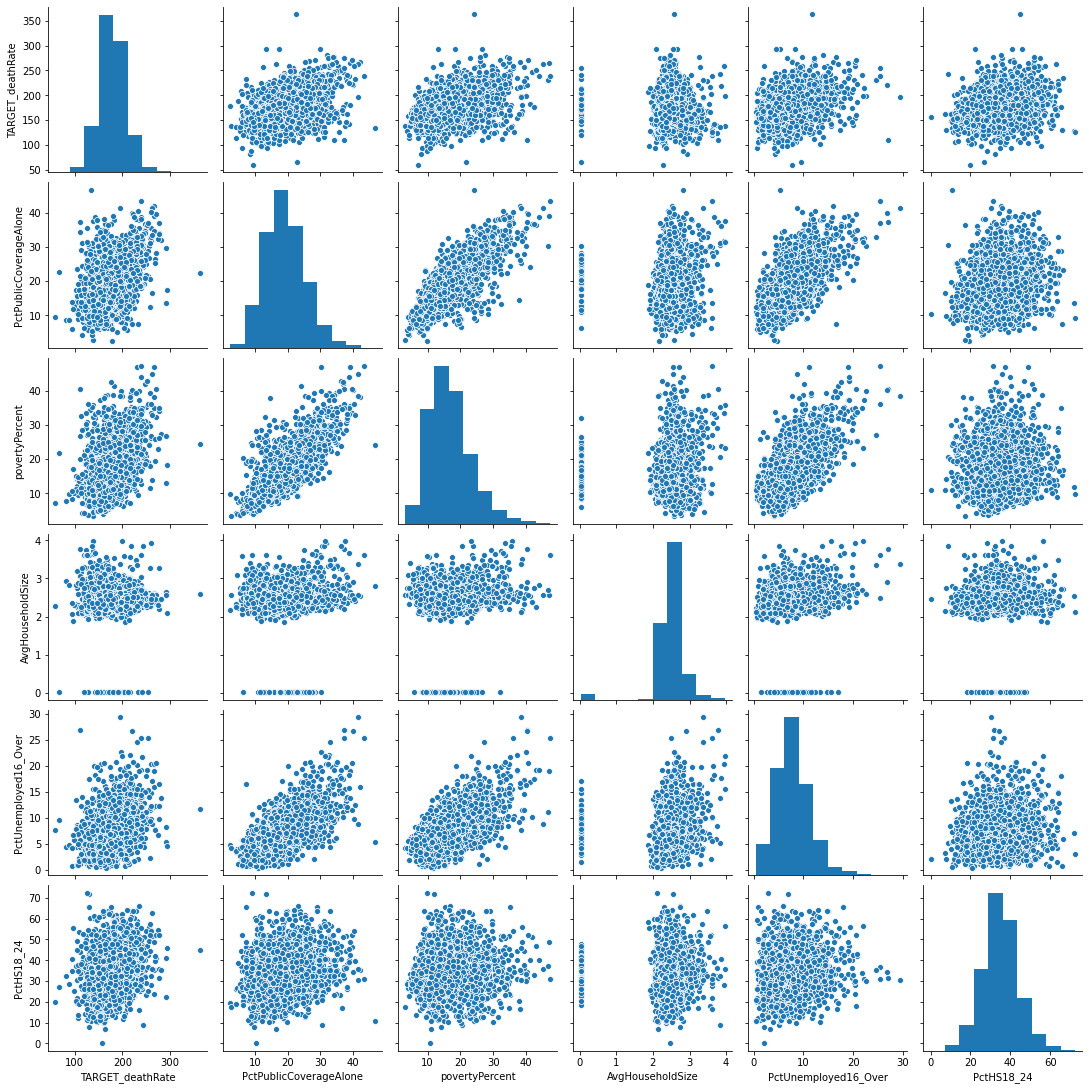

In [10]:
sns.pairplot(cancer_data)

<AxesSubplot:xlabel='TARGET_deathRate'>

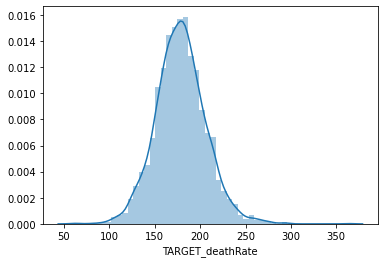

In [12]:
sns.distplot(cancer_data["TARGET_deathRate"])

<AxesSubplot:>

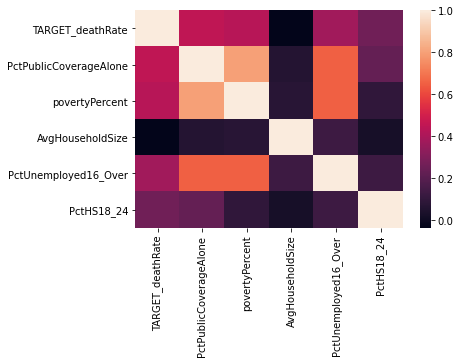

In [13]:
sns.heatmap(cancer_data.corr())

Można wywnioskować, że zmienne opisujące nie są silnie skorelowane ze sobą nawzajem (może z wyjątkiem povertyPercent i PctPublicCoverageAlone, ale z tym regresja powinna sobie jeszcze poradzić). Jest to jedyne założenie o danych potrzebne do regresji liniowej, które możemy prosto sprawdzić bez posiadania już wyliczonego modelu.  

## Regresja liniowa ze Scikit-learn

W tej części sprawdzimy jak gotowy model regresji liniowej z pakietu Scikit-learn poradzi sobie z zadaniem.

### Podział danych i model

In [ ]:
X = cancer_data[[
    "PctPublicCoverageAlone",
    "povertyPercent",
    "AvgHouseholdSize",
    "PctUnemployed16_Over",
    "PctHS18_24"]]

y = cancer_data["TARGET_deathRate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

### Działanie modelu

Zobaczmy, jakie wartości przymują dla naszego modelu metryki zdefiniowane na wykładzie.

In [ ]:
print(f"RSS: {np.sum((y_test - linear_model.predict(X_test)) ** 2)}")
print(f"RMSE: {np.sqrt(np.mean((y_test - linear_model.predict(X_test)) ** 2))}")
print(f"MAE: {np.mean(abs(y_test - linear_model.predict(X_test)))}")

In [ ]:
print(linear_model.intercept_)
coeff_df = pd.DataFrame(linear_model.coef_, X.columns, columns=["Coefficient"])
coeff_df

In [ ]:
predictions = linear_model.predict(X_test)

In [ ]:
plt.scatter(y_test, linear_model.predict(X_test))

In [ ]:
sns.distplot((y_test-linear_model.predict(X_test)), bins=50)

Widzimy, że szacowany błąd na zbiorze testowym jest dany rozkładem normalnym o wartości oczekiwanej w przybliżeniu równej 0. Zatem w tym momencie możemy stwierdzić, iż spełnione jest kolejne z założeń o danych, potrzebne dla właściwego funkcjonowania regresji liniowej.

### Ustandaryzowanie danych

Sprawdzimy, jak ustandaryzowanie danych tak, aby miały tę samą średnią i odchylenie standardowe wpłynie na wynik regresji. W tym celu ponownie zastosujemy pakiet Scikit-learn.

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_rescaled = scaler.transform(X_train)
X_test_rescaled = scaler.transform(X_test)

In [ ]:
linear_model_r = LinearRegression()
linear_model_r.fit(X_train_rescaled, y_train)

In [ ]:
print(f"RSS: {np.sum((y_test - linear_model_r.predict(X_test_rescaled)) ** 2)}")
print(f"RMSE: {np.sqrt(np.mean((y_test - linear_model_r.predict(X_test_rescaled)) ** 2))}")
print(f"MAE: {np.mean(abs(y_test - linear_model_r.predict(X_test_rescaled)))}")

In [ ]:
print(linear_model_r.intercept_)
coeff_df = pd.DataFrame(linear_model_r.coef_, X.columns, columns=["Coefficient"])
coeff_df

In [ ]:
plt.scatter(y_test, linear_model_r.predict(X_test_rescaled))

In [ ]:
sns.distplot((y_test-linear_model_r.predict(X_test_rescaled)), bins=50)

Możemy zauważyć, że metryki nie zmieniają się, mimo że trochę zmieniliśmy dane, a co za tym idzie i wyliczone współczynniki.

Mimo że nie zmieniły sie wartości metryk, widzimy korzystną zmianę wśród wyliczonych wartości współczynników - są one teraz tego samego rzędu wielkości, co zapobiega potencjalnym błędom numerycznym. Ponadto po tej zmianie, wyliczony wyraz wolny modelu możemy interpretować jako wartość przyjmowaną przez funkcję, gdy dane wejściowe przyjmują swoje wartości średnie.

## Prosta regresja liniowa

Zanim przejdziemy do głównego zadania, spróbujmy czegoś prostszego - znalezienia prostej najlepszego dopasowania dla sztucznie wygenerowanych jednowymiarowych danych.

Wygenerujemy dane dla równania: $$y = 2x+1 + \varepsilon $$

In [ ]:
x = np.linspace(0, 10, num=100).reshape(100, 1)
y = 2. * x + 1 + np.random.normal(size=(100, 1))
plt.scatter(x, y)

Teraz zapomnijmy na chwilę, że znamy zadane współczynniki i spróbujmy znaleźć je przy pomocy prostej regresji liniowej.

### Prosta regresja liniowa z zejściem wzdłuż gradientu

Przypomnijmy z wykładu,że prostą najlepszego dopasowania znajdujemy poprzez minimalizację pewnej funkcji kosztu (uznajemy, że zmiennymi w tej funkcji są współczynniki równania, którego szukamy).

Wektory $x$ i $y$ są wymiaru $n$ $x$ $1$.

Zdefiniujmy naszą funkcję kosztu:

$$L(w_0, w_1) = \frac{1}{2n}\sum_{i=0}^{n-1}(w_0+w_1x_i-y_i)^2$$

Różni się ona nieco od tej zdefiniowanego na wykładzie RSS:
* Podzielimy wartość przez 2, aby uprościć stałą pochodzącą z kwadratu w pochodnej.
* Podzielimy wartość przez $n$, aby uczynić funkcję kosztu niezależną od liczby analizowanych w danym momencie próbek.

Naszym pierwszym podejściem będzie minimalizacja funkcji kosztu poprzez zejście wzdłuż gradientu. Wykonamy pewną liczbę iteracji (liczbę iteracji będzie zadawał parametr epoch_number). W każdej iteracji wyliczymy pochodne po $w_0$ oraz $w_1$, a następnie zaktualizujemy wagi odejmując od nich odpowiadające im pochodne pomnożone przez niewielką stałą uczącą (parametr nazwany lr).

In [ ]:
class SimpleLinearModelGD():
    def __init__(self):
        self.w0 = np.random.rand()
        self.w1 = np.random.rand()

    def predict(self, x):
        """
        Computes model prediction for given datapoints.
        
        n - number of data samples
        
        Args:
          x: Vector of datapoints. Size: n x 1.
          
        Returns:
          Predicted y values.
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #

    def loss_function(self, x, y):
        """
        Computes loss function.
        
        n - number of data samples
        p - number of model coefficients including the intercept
        
        Args:
          x: Vector of datapoints. Size: n x 1.
          y: Vector of actual values for given datapoints. Size: n x 1.
          
        Returns:
          Loss function for given data and current coefficients values.
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #

    
    def dL_dw0(self, x, y):
        """
        Computes derivative of loss function.
        
        n - number of data samples
        
        Args:
          x: Vector of datapoints. Size: n x 1.
          y: Vector of actual values for given datapoints. Size: n x 1.
          
        Returns:
          Derivative of loss function.
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #
        
    def dL_dw1(self, x, y):
        """
        Computes derivative of loss function.
        
        n - number of data samples
        
        Args:
          x: Vector of datapoints. Size: n x 1.
          y: Vector of actual values for given datapoints. Size: n x 1.
          
        Returns:
          Derivative of loss function.
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #
    
    def train(self, x, y, lr=.001, epoch_num=20):
        """
        Performs gradient descent.
        
        n - number of data samples
        p - number of model coefficients including the intercept
        
        Args:
          x: Vector of datapoints. Size: n x 1.
          y: Vector of actual values for given datapoints. Size: n x 1.
          lr: Learning rate.
          epoch_num: Number of epochs.
        """
        
        loss = []
        for i in range(epoch_num):
            # Implement 
            raise NotImplementedError("Code not implemented")
            #
            loss.append(self.loss_function(x, y))
    
        plt.plot(loss)
        plt.title("Loss function")


In [ ]:
lr = .001
epoch_num = 200
np.random.seed(seed=1234)
simple_linear_model_gd = SimpleLinearModelGD()
simple_linear_model_gd.train(x, y, lr, epoch_num)

In [ ]:
print(f"Computed w_0: {simple_linear_model_gd.w0}")
print(f"Computed w_0: {simple_linear_model_gd.w1}")
plt.scatter(x, y)
plt.plot(x, simple_linear_model_gd.predict(x), color="red")

In [ ]:
print(f"RSS: {np.sum((y - simple_linear_model_gd.predict(x)) ** 2)}")
print(f"RMSE: {np.sqrt(np.mean((y - simple_linear_model_gd.predict(x)) ** 2))}")
print(f"MAE: {np.mean(abs(y - simple_linear_model_gd.predict(x)))}")

### Prosta regresja liniowa zgodnie ze wzorem

In [ ]:
class SimpleLinearModel():
    
    def __init__(self):
        self.w0 = None
        self.w1 = None
        
    def predict(self, x):
        """
        Computes model prediction for given datapoints.
        
        n - number of data samples
       
        Args:
          x: Vector of datapoints. Size: n x 1.
          
        Returns:
          Predicted y values.
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #
    
    def compute(self, x, y):
        """
        Computes coefficients that give the minimal loss value.
        
        n - number of data samples
       
        Args:
          x: Vector of datapoints. Size: n x 1.
          y: Vector of actual values for given datapoints. Size: n x 1.
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #

In [ ]:
simple_linear_model = SimpleLinearModel()
simple_linear_model.compute(x, y)

In [ ]:
print(f"Computed w_0: {simple_linear_model.w0}")
print(f"Computed w_1: {simple_linear_model.w1}")
plt.scatter(x, y)
plt.plot(x, simple_linear_model.predict(x), color="red")

In [ ]:
print(f"RSS: {np.sum((y - simple_linear_model.predict(x)) ** 2)}")
print(f"RMSE: {np.sqrt(np.mean((y - simple_linear_model.predict(x)) ** 2))}")
print(f"MAE: {np.mean(abs(y-simple_linear_model.predict(x)))}")

## Wielowymiarowa regresja liniowa z zejściem wzdłuż gradientu

Wróćmy teraz do naszego zbioru danych.

Przypomnijmy, że do obliczenia regresji liniowej potrzebujemy reprezentować dane opisujące funkcję w macierzy o rozmiarze $n$ $x$ $(p-1)$, gdzie $n$ - liczba punktów danych, $p-1$ - wymiar punktów danych. Macierz tę powinniśmy uzupełnić o kolumnę złożoną z samych jedynek (zatem finalnie ma ona rozmiar $n$ $x$ $p$.

### Przygotowanie danych

Przygotujmy dane do obliczeń. W tym celu najpierw wykonajmy ich standaryzację, a potem zadbamy o odpowiedni wymiar macierzy i wektorów.

In [ ]:
def prepare_data(X_train, y_train, X_test, y_test):
    X_train_np = X_train.to_numpy()
    X_train_std = np.std(X_train_np, axis=0, keepdims=True)
    X_train_mean = np.mean(X_train_np, axis=0, keepdims=True)
    X_train_normalized = (X_train_np - X_train_mean) / X_train_std
    
    X_test_np = X_test.to_numpy()
    X_test_normalized = (X_test_np - X_train_mean) / X_train_std
    return (np.hstack([np.ones((X_train_np.shape[0], 1)), X_train_normalized]),
            np.expand_dims(y_train.to_numpy(), axis=1),
            np.hstack([np.ones((X_test_np.shape[0], 1)), X_test_normalized]),
            np.expand_dims(y_test.to_numpy(), axis=1))

In [ ]:
X_train_np, y_train_np, X_test_np, y_test_np = prepare_data(X_train, y_train, X_test, y_test)

### Definicja modelu

In [ ]:
class LinearModelGD():
    def __init__(self, size):
        self.w = np.random.rand(size, 1)

    def predict(self, X):
        """
        Computes model prediction for given datapoints.
        
        n - number of data samples
        p - number of model coefficients including the intercept
        
        Args:
          X: Matrix of datapoints. Size: n x p.
          
        Returns:
          Predicted y values.
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #

    def loss_function(self, X, y):
        """
        Computes Residual Sum of Squares.
        
        n - number of data samples
        p - number of model coefficients including the intercept
        
        Args:
          X: Matrix of datapoints. Size: n x p.
          y: Vector of actual values for given datapoints. Size: n x 1.
          
        Returns:
          RSS for given data.
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #
    
    def gradient(self, X, y):
        """
        Computes gradient pf loss function.
        
        n - number of data samples
        p - number of model coefficients including the intercept
        
        Args:
          X: Matrix of datapoints. Size: n x p.
          y: Vector of actual values for given datapoints. Size: n x 1.
          
        Returns:
          Gradient of loss function. Size: p x 1
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #
    
    def train(self, X, y, lr=.001, epoch_num=20000):
        """
        Performs gradient descent.
        
        n - number of data samples
        p - number of model coefficients including the intercept
        
        Args:
          X: Matrix of datapoints. Size: n x p.
          y: Vector of actual values for given datapoints. Size: n x 1.
          lr: Learning rate.
          epoch_num: Number of epochs.
        """
        
        loss = []
        for i in range(epoch_num):
            # Implement 
            raise NotImplementedError("Code not implemented")
            #
            loss.append(self.loss_function(X, y))
            plt.title("Loss function")
    
        plt.plot(loss)

In [ ]:
lr = .001
epoch_num = 20000
np.random.seed(seed=1234)
linear_model_gd = LinearModelGD(6)
linear_model_gd.train(X_train_np, y_train_np, lr, epoch_num)

### Działanie modelu

In [ ]:
linear_model_gd.w

In [ ]:
print(f"RSS: {np.sum((y_test_np - linear_model_gd.predict(X_test_np)) ** 2)}")
print(f"RMSE: {np.sqrt(np.mean((y_test_np - linear_model_gd.predict(X_test_np)) ** 2))}")
print(f"MAE: {np.mean(abs(y_test_np - linear_model_gd.predict(X_test_np)))}")

In [ ]:
plt.scatter(y_test_np, linear_model_gd.predict(X_test_np))

In [ ]:
sns.distplot((y_test_np-linear_model_gd.predict(X_test_np)), bins=50)

## Wielowymiarowa regresja liniowa ze wzoru

### Definicja modelu

In [ ]:
class LinearModel():
    
    def __init__(self, size):
        self.w = None
        
    def predict(self, X):
        """
        Computes model prediction for given datapoints.
        
        n - number of data samples
        p - number of model coefficients including the intercept
        
        Args:
          X: Matrix of datapoints. Size: n x p.
          
        Returns:
          Predicted y values.
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #
    
    def compute(self, X, y):
        """
        Computes coefficients that give the minimal loss value.
        
        n - number of data samples
        p - number of model coefficients including the intercept
        
        Args:
          X: Matrix of datapoints. Size: n x p.
          y: Vector of actual values for given datapoints. Size: n x 1.
        """
        
        # Implement 
        raise NotImplementedError("Code not implemented")
        #

In [ ]:
linear_model = LinearModel(6)
linear_model.compute(X_train_np, y_train_np)

### Działanie modelu

In [ ]:
print(linear_model.w)

In [ ]:
print(f"RSS: {np.sum((y_test_np - linear_model.predict(X_test_np)) ** 2)}")
print(f"RMSE: {np.sqrt(np.mean((y_test_np - linear_model.predict(X_test_np)) ** 2))}")
print(f"MAE: {np.mean(abs(y_test_np - linear_model.predict(X_test_np)))}")

In [ ]:
plt.scatter(y_test_np, linear_model.predict(X_test_np))

In [ ]:
sns.distplot((y_test_np-linear_model.predict(X_test_np)), bins=50)

Jak widać obydwoma metodami osiągnęliśmi wynik zgodny z wynikiem danym przez pakiet Scikit-learn.